# Load Data and Handle Missing Values

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [193]:
dataset=pd.read_csv('nursing_homes.csv')
dataset.shape

(15082, 29)

In [194]:
dataset['special_focus_status']=dataset['special_focus_status'].fillna(value='No')

In [195]:
dataset=dataset.dropna()
dataset.shape

(10423, 29)

# Some Data Understanding

In [196]:
grouped=dataset.groupby(['provider_state'])

In [197]:
avg=grouped['overall_rating'].mean()
type(avg)

pandas.core.series.Series

Text(0, 0.5, 'Average Rating per state')

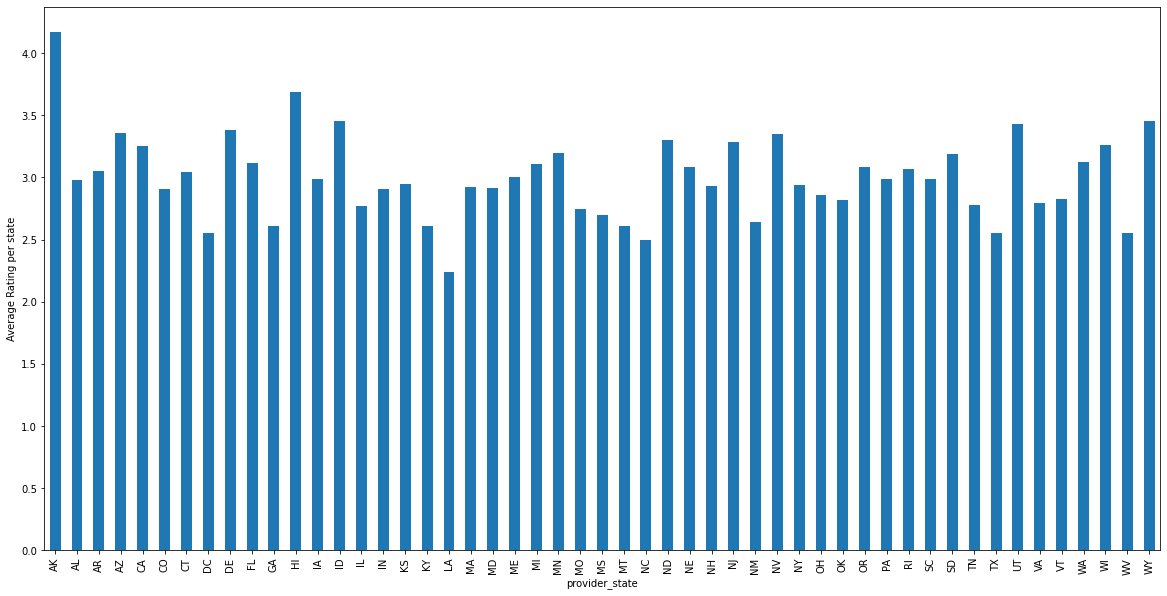

In [198]:
avg.plot(kind='bar',figsize=(20,10))
plt.ylabel("Average Rating per state")

Arkansas has the best nursing home care average rating with over 4 stars

The lowest is Louisiana with an average of around 2.2 stars

Pennsylvaina has an average rating of 3 stars

                                     number_of_certified_beds  \
number_of_certified_beds                             1.000000   
average_number_of_residents_per_day                  0.903002   

                                     average_number_of_residents_per_day  
number_of_certified_beds                                        0.903002  
average_number_of_residents_per_day                             1.000000  


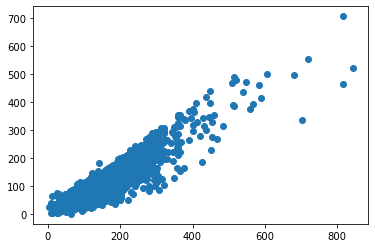

In [199]:
plt.scatter(dataset['number_of_certified_beds'],dataset['average_number_of_residents_per_day'])
subset=dataset[['number_of_certified_beds','average_number_of_residents_per_day']]
print(subset.corr())
plt.show()

There is a high correlation between average number of residents, and number of certified beds that a nursing home has. The more residents, the more beds it has

In [200]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['abuse_icon']=le.fit_transform(dataset['abuse_icon'])

Text(0, 0.5, 'Percentage of Homes Labeled with Abuse Icon')

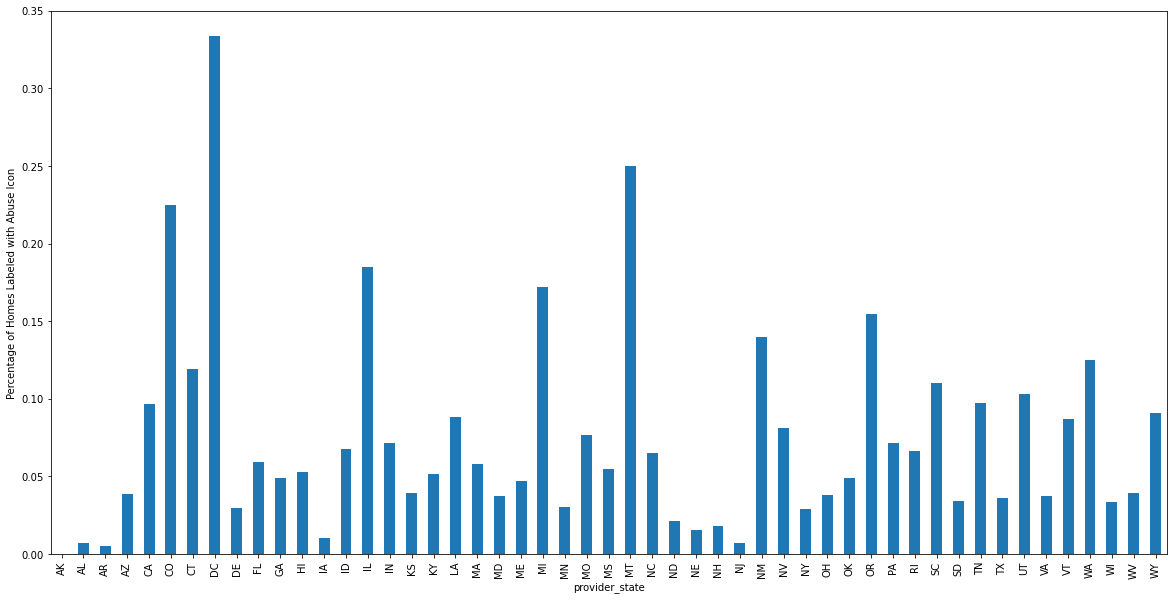

In [201]:
abuse=dataset.groupby(['provider_state']).mean()
abuse['abuse_icon'].plot(kind='bar',figsize=(20,10))
plt.ylabel('Percentage of Homes Labeled with Abuse Icon')

Washington D.C. tends to have on average the most percentage it's nursing homes listed as an abuse icon with almost 35%!!!

New Jersey has the least average with less 3% of it's nursing homes labeled with an abuse icon

Pennsylvania has a little over 5% of it's homes on average fitting the abuse icon category

Text(0, 0.5, 'Number of homes')

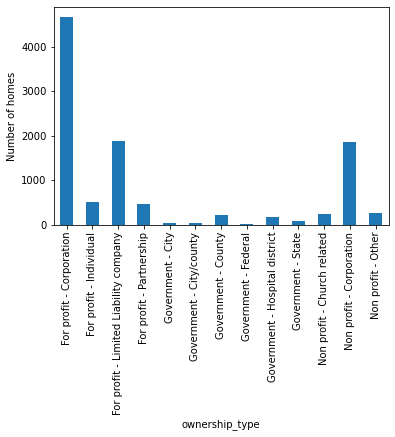

In [202]:
ownership=dataset.groupby('ownership_type')
ownership['ownership_type'].count().plot(kind='bar')
plt.ylabel("Number of homes")

Profit Coroprations control a substantial amount of the nursing homes. Interesting!

Government doesn't really own nursing homes at all

Nonprofits play some ownership role in homes, but it is mostly dominated by profit oriented owners

# Data Preprocessing

In [203]:
reco_system_data=dataset.copy()
reco_system_data.shape

(10423, 29)

In [204]:
reco_system_data=reco_system_data.drop(['provider_state','provider_zip_code','ownership_type','provider_type'],axis=1)
reco_system_data.shape

(10423, 25)

In [205]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_licensed_staffing_hours_per_resident_per_day,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties
4,PLANTATION MANOR NURSING HOME,103,84.6,N,N,No,0,Y,Resident,Yes,...,1.09792,3.22409,0.14552,1.0,0,2,0.0,2,0,2
6,MERRY WOOD LODGE,124,95.8,N,N,No,0,Y,Resident,Yes,...,1.10740,3.28756,0.26307,0.0,0,2,0.0,0,0,0
7,HATLEY HEALTH CARE INC,201,85.8,N,N,No,0,N,Both,Yes,...,2.03030,3.70992,0.58237,0.0,1,0,0.0,0,0,0
10,KELLER LANDING,109,71.0,N,N,No,0,N,Resident,Yes,...,1.61009,3.29073,0.35334,4.0,0,0,0.0,0,0,0
12,DIVERSICARE OF FOLEY,154,106.4,N,N,SFF Candidate,0,Y,Resident,Yes,...,1.25783,3.04335,0.48237,0.0,3,2,0.0,1,0,1


In [206]:
reco_system_data.shape

(10423, 25)

In [207]:
i=LabelEncoder()
reco_system_data['provider_resides_in_hospital']=i.fit_transform(reco_system_data['provider_resides_in_hospital'])

In [208]:
reco_system_data['continuing_care_retirement_community']=i.fit_transform(reco_system_data['continuing_care_retirement_community'])
reco_system_data['special_focus_status']=i.fit_transform(reco_system_data['special_focus_status'])
reco_system_data['most_recent_health_inspection_more_than_2_years_ago']=i.fit_transform(reco_system_data['most_recent_health_inspection_more_than_2_years_ago'])
reco_system_data['with_a_resident_and_family_council']=i.fit_transform(reco_system_data['with_a_resident_and_family_council'])

In [209]:
reco_system_data['automatic_sprinkler_systems_in_all_required_areas']=i.fit_transform(reco_system_data['automatic_sprinkler_systems_in_all_required_areas'])

In [210]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_licensed_staffing_hours_per_resident_per_day,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,1.09792,3.22409,0.14552,1.0,0,2,0.0,2,0,2
6,MERRY WOOD LODGE,124,95.8,0,0,0,0,1,3,2,...,1.10740,3.28756,0.26307,0.0,0,2,0.0,0,0,0
7,HATLEY HEALTH CARE INC,201,85.8,0,0,0,0,0,0,2,...,2.03030,3.70992,0.58237,0.0,1,0,0.0,0,0,0
10,KELLER LANDING,109,71.0,0,0,0,0,0,3,2,...,1.61009,3.29073,0.35334,4.0,0,0,0.0,0,0,0
12,DIVERSICARE OF FOLEY,154,106.4,0,0,1,0,1,3,2,...,1.25783,3.04335,0.48237,0.0,3,2,0.0,1,0,1


In [211]:
addon=reco_system_data['overall_rating'].copy()
reco_system_data=reco_system_data.drop('overall_rating',axis=1)
reco_system_data['overall_rating']=addon

In [212]:
reco_system_data.head(5)

,provider_name,number_of_certified_beds,average_number_of_residents_per_day,provider_resides_in_hospital,continuing_care_retirement_community,special_focus_status,abuse_icon,most_recent_health_inspection_more_than_2_years_ago,with_a_resident_and_family_council,automatic_sprinkler_systems_in_all_required_areas,...,reported_total_nurse_staffing_hours_per_resident_per_day,registered_nurse_hours_per_resident_per_day_on_the_weekend,number_of_administrators_who_have_left_the_nursing_home,number_of_facility_reported_incidents,number_of_substantiated_complaints,number_of_citations_from_infection_control_inspections,number_of_fines,number_of_payment_denials,total_number_of_penalties,overall_rating
4,PLANTATION MANOR NURSING HOME,103,84.6,0,0,0,0,1,3,2,...,3.22409,0.14552,1.0,0,2,0.0,2,0,2,2.0
6,MERRY WOOD LODGE,124,95.8,0,0,0,0,1,3,2,...,3.28756,0.26307,0.0,0,2,0.0,0,0,0,2.0
7,HATLEY HEALTH CARE INC,201,85.8,0,0,0,0,0,0,2,...,3.70992,0.58237,0.0,1,0,0.0,0,0,0,3.0
10,KELLER LANDING,109,71.0,0,0,0,0,0,3,2,...,3.29073,0.35334,4.0,0,0,0.0,0,0,0,5.0
12,DIVERSICARE OF FOLEY,154,106.4,0,0,1,0,1,3,2,...,3.04335,0.48237,0.0,3,2,0.0,1,0,1,1.0


In [213]:
from sklearn.model_selection import train_test_split
X=reco_system_data.values[:,:-1]
Y=reco_system_data.values[:,-1]
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [214]:
x_train.shape

(8338, 24)

In [215]:
x_test.shape

(2085, 24)

In [218]:
nearest_neighbors_name=reco_system_data.values[:,0]
x_train=np.delete(x_train,0,axis=1)
x_test=np.delete(x_test,0,axis=1)

In [219]:
x_train

array([[88, 82.9, 0, ..., 11, 0, 11],
       [74, 62.6, 0, ..., 0, 0, 0],
       [150, 107.9, 0, ..., 1, 0, 1],
       ...,
       [27, 23.3, 0, ..., 4, 0, 4],
       [80, 44.6, 0, ..., 3, 0, 3],
       [120, 105.9, 0, ..., 16, 0, 16]], dtype=object)

In [222]:
nearest_neighbors_name

array(['PLANTATION MANOR NURSING HOME', 'MERRY WOOD LODGE',
       'HATLEY HEALTH CARE INC', ..., 'BLUEBONNET POINT WELLNESS',
       'KENDALL LAKES HEALTHCARE AND REHAB CENTER',
       'HARMONY HEALTH CENTER'], dtype=object)

Really only beds and average residents needs scaling given scales of other features

HOWEVER, because we are using distance based method being KNN, we will feature scale all the features

<AxesSubplot:>

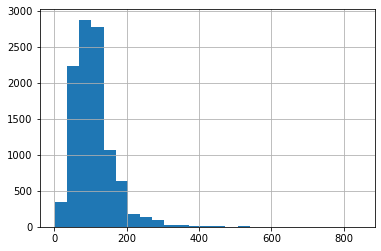

In [221]:
dataset['number_of_certified_beds'].hist(bins=25)


<AxesSubplot:>

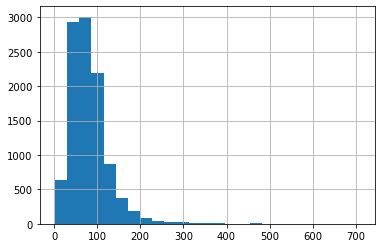

In [223]:
dataset['average_number_of_residents_per_day'].hist(bins=25)

Data follows normal distribution and may contain outliers

Transform data into gaussian distribution using Standard Scaler

In [225]:
x_train.shape

(8338, 23)

In [226]:
x_test.shape

(2085, 23)

In [228]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [230]:
x_train

array([[-0.35580227,  0.03444105, -0.14684462, ...,  3.34726381,
        -0.35905859,  3.08365306],
       [-0.59711623, -0.39598023, -0.14684462, ..., -0.74056797,
        -0.35905859, -0.75273894],
       [ 0.71287383,  0.56451652, -0.14684462, ..., -0.3689469 ,
        -0.35905859, -0.40397603],
       ...,
       [-1.40724167, -1.22925887, -0.14684462, ...,  0.74591631,
        -0.35905859,  0.64231269],
       [-0.49369596, -0.77763457, -0.14684462, ...,  0.37429524,
        -0.35905859,  0.29354978],
       [ 0.19577249,  0.52211048, -0.14684462, ...,  5.20536916,
        -0.35905859,  4.8274676 ]])

In [231]:
x_test

array([[ 3.68139607e-01,  3.03719385e-01, -1.46844620e-01, ...,
        -3.68946896e-01, -3.59058587e-01, -4.03976035e-01],
       [-4.41985829e-01, -3.19649367e-01, -1.46844620e-01, ...,
         4.09050595e+00,  6.14926858e+00,  4.82746760e+00],
       [-1.01079731e+00, -8.13679704e-01, -1.46844620e-01, ...,
        -3.68946896e-01, -3.59058587e-01, -4.03976035e-01],
       ...,
       [-2.00671870e-01,  2.50711838e-01, -1.46844620e-01, ...,
        -7.40567966e-01, -3.59058587e-01, -7.52738944e-01],
       [ 5.40506721e-01,  6.02681949e-01, -1.46844620e-01, ...,
        -3.68946896e-01, -3.59058587e-01, -4.03976035e-01],
       [ 1.28168531e+00,  4.09734479e-01, -1.46844620e-01, ...,
         2.67417417e-03, -3.59058587e-01, -5.52131255e-02]])